In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


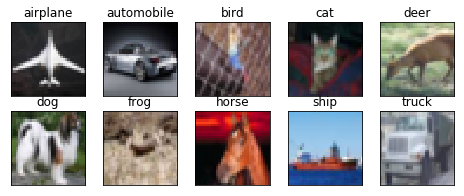

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
from tensorflow.keras import layers,models

def add_batchnorm_relu(inp):
    inp = layers.BatchNormalization()(inp)
    inp = layers.ReLU()(inp)
    return inp

class Resnet:

    def __init__(self):
        self.img_height = 32
        self.img_width = 32
        self.img_channels = 3

    def build_resnet(self):
        _input = layers.Input(shape=(self.img_height, self.img_width, self.img_channels))
        inp = self.prep(_input)

        inp = self.down_sample(inp,128)
        shortcut = inp
        inp = self.block(inp,64,128)
        inp = layers.add([shortcut,inp])

        inp = self.down_sample(inp, 256)

        inp = self.down_sample(inp, 512)
        shortcut = inp
        inp = self.block(inp,128, 512)
        inp = layers.add([shortcut, inp])

        inp = layers.GlobalMaxPooling2D()(inp)
        out = layers.Dense(10,activation='softmax')(inp)

        model = models.Model(inputs=[_input], outputs=[out])
        return model

    def prep(self,inp):
        inp = layers.Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same')(inp)
        inp = add_batchnorm_relu(inp)
        return inp

    def down_sample(self,inp,channel_out):
        inp = layers.Conv2D(channel_out, kernel_size=(3, 3), strides=(1, 1), padding='same')(inp)
        inp = add_batchnorm_relu(inp)
        inp = layers.MaxPool2D(pool_size=(2, 2))(inp)
        return inp

    def block(self,inp,channel_in,channel_out):
        inp = layers.Conv2D(channel_in, kernel_size=(3, 3), strides=(1, 1), padding='same')(inp)
        inp = add_batchnorm_relu(inp)
        inp = layers.Conv2D(channel_out, kernel_size=(3, 3), strides=(1, 1), padding='same')(inp)
        inp = add_batchnorm_relu(inp)
        return inp


In [23]:

resnet = Resnet()
model = resnet.build_resnet()
print(model.summary())

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_29 (Conv2D)              (None, 32, 32, 64)   1792        input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_29 (BatchNo (None, 32, 32, 64)   256         conv2d_29[0][0]                  
__________________________________________________________________________________________________
re_lu_29 (ReLU)                 (None, 32, 32, 64)   0           batch_normalization_29[0][0]     
____________________________________________________________________________________________

W0811 22:18:41.915273 140603721365376 training.py:593] The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/10
391/391 [==============================] - 28s 72ms/step - loss: 1.2162 - acc: 0.5920 - val_loss: 1.8662 - val_acc: 0.3952
Epoch 2/10
391/391 [==============================] - 25s 65ms/step - loss: 0.6448 - acc: 0.7777 - val_loss: 1.0645 - val_acc: 0.6721
Epoch 3/10
391/391 [==============================] - 25s 64ms/step - loss: 0.4538 - acc: 0.8447 - val_loss: 1.0364 - val_acc: 0.6895
Epoch 4/10
391/391 [==============================] - 25s 64ms/step - loss: 0.3278 - acc: 0.8875 - val_loss: 1.4435 - val_acc: 0.6312
Epoch 5/10
391/391 [==============================] - 25s 64ms/step - loss: 0.2321 - acc: 0.9223 - val_loss: 0.6520 - val_acc: 0.7909
Epoch 6/10
391/391 [==============================] - 25s 64ms/step - loss: 0.1337 - acc: 0.9576 - val_loss: 0.9180 - val_acc: 0.7455
Epoch 7/10
391/391 [==============================] - 25s 64ms/step - loss: 0.0863 - acc: 0.9742 - val_loss: 1.0119 - val_acc: 0.7374
Epoch 8/10
391/391 [==============================] - 25s 65ms

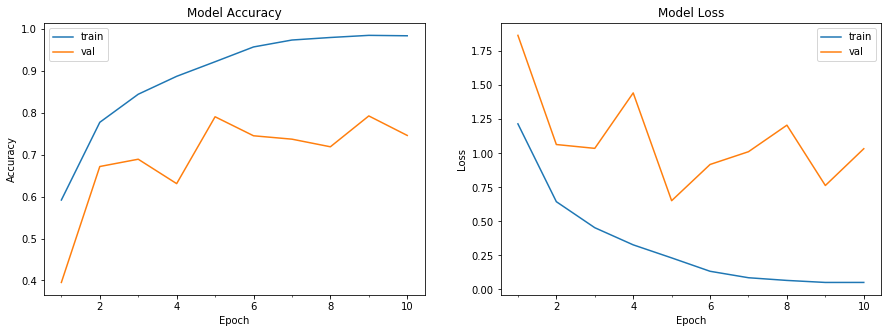

Accuracy on test data is: 74.63


In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit(datagen.flow(train_features, train_labels, batch_size = 128),
                                  nb_epoch = 10, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))